## 可视化

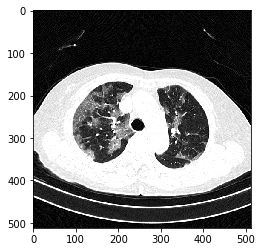

PNG (512, 512) L


In [55]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image

file_path = '/staff/shijun/torch_projects/COVID-19_CLS/dataset/raw_data/CP/CP-12/CP/1455/3985/0041.png'
image = Image.open(file_path)
plt.imshow(image,cmap='gray')
plt.show()

print(image.format,image.size,image.mode)

0.002


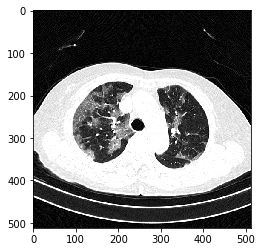

255.0 37.0
(512, 512)
0.002


/staff/shijun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


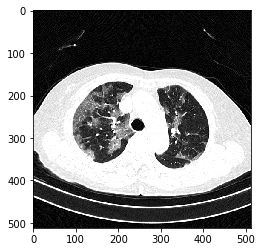

255.0 37.0
(512, 512)


In [56]:
import numpy as np
import time

start_time = time.time()
img_array = np.asarray(image,dtype=np.float32)
print('%.3f'% (time.time() - start_time))
plt.imshow(img_array,cmap='gray')
plt.show()
print(np.max(img_array),np.min(img_array))
print(img_array.shape)

start_time = time.time()
img_arr = np.fromstring(image.tobytes(), dtype=np.uint8)
img_arr = img_arr.reshape(image.size).astype(np.float32)
print('%.3f'% (time.time() - start_time))
plt.imshow(img_arr,cmap='gray')
plt.show()
print(np.max(img_arr),np.min(img_arr))
print(img_arr.shape)

## 读取并转为3D格式

In [4]:
from PIL import Image
import os
import numpy as np
from  convert_to_npy import img_reader
import time

dim = (512,512)

# def img_reader(input_path,dim):
#     image = Image.open(input_path).convert('L')
#     if image.size != dim:
#         image = image.resize(dim,Image.NEAREST)
#     image = np.asarray(image,dtype=np.float32)
#     image = image/255.0
#     return image

start_time = time.time()
file_path = '/staff/shijun/torch_projects/COVID-19_CLS/dataset/raw_data/CP/CP-12/CP/1455/3985/'
item_list = os.listdir(file_path)
item_list.sort(key = lambda x:int(x.split('.')[0]))
# print(item_list)

images = [img_reader(os.path.join(file_path,item),dim) for item in item_list]

images = np.stack(images,axis=0)

print(images.shape)
print("%.3f"%(time.time()-start_time))
    

(138, 512, 512)
2.676


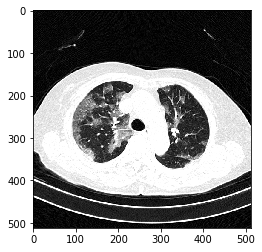

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.imshow(images[42],cmap='gray')
plt.show()

# for i in range(images.shape[0]):
#     plt.imshow(images[i],cmap='gray')
#     plt.show()
    

## 测试数据

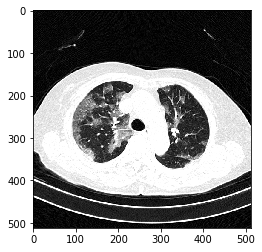

In [2]:
from data_utils import hdf5_reader
%matplotlib inline
import matplotlib.pyplot as plt 

path =  '/staff/shijun/torch_projects/COVID-19_CLS/dataset/npy_data/CP/3985.hdf5'
image = hdf5_reader(path,'img')

plt.imshow(image[42],cmap='gray')
plt.show()